In [1]:
import sys
import copy
import math
import scipy
import plfit
import random
import powerlaw
import numpy as np
import networkx as nx
from numpy.random import seed
import matplotlib.pyplot as plt

from PIL import Image
from tabulate import tabulate
from collections import defaultdict

sys.path.append('.')
sys.path.append('../../')
sys.path.append('../network_model/')

%load_ext autoreload
%autoreload 2
from graph_creation import create_graph

In [2]:
cherrypicked_seed = 42

seed(cherrypicked_seed)
random.seed(cherrypicked_seed)

# Validation scale-free networks

In [3]:
n_networks = 30
n_nodes = 50

In [4]:
# Funzione per calcolare l'intervallo di confidenza
def confidence_interval(data, n):
    
    mean = np.mean(data)
 
    s_sum = 0
    for i in range(len(data)):
        s_sum += (data[i] - mean) * (data[i] - mean)
    s_q = (1 / (n-1)) * s_sum
    s = np.sqrt(s_q)  
    sampling_error = s/(np.sqrt(n)) * scipy.stats.t.ppf(1.95 / 2.0, n-1)
    
    return (mean - sampling_error, mean + sampling_error)

In [5]:
Ds = []
p_values_plfit = []
Rs_exponential = []
p_values_exponential = []

for i in range(n_networks):
    N = create_graph(n_nodes, 1/3, 1/3, 1, 1, 0.5)
    degrees = [i for n,i in N.degree()]
    # con xmin=1 considero tutti i dati per il fit
    powerlaw_results = powerlaw.Fit(degrees, xmin=1, discrete=True)
    D = powerlaw_results.power_law.D

    plfit_results = plfit.plfit(degrees)
    p_value_plfit = plfit_results.test_pl()[0]

    Ds.append(D)
    p_values_plfit.append(p_value_plfit)

average_D = np.sum(Ds) / n_networks
low_D, high_D = confidence_interval(Ds, n_networks)
average_p_value_plfit = np.sum(p_values_plfit) / n_networks
low_p_value_plfit, high_p_value_plfit = confidence_interval(p_values_plfit, n_networks)

p(1000) = 0.696
p(1000) = 0.958
p(1000) = 0.789
p(1000) = 0.377
p(1000) = 0.869
p(1000) = 0.507
p(1000) = 0.566
p(1000) = 0.926
p(1000) = 0.845
p(1000) = 0.919
p(1000) = 0.732
p(1000) = 0.322
p(1000) = 0.751
p(1000) = 0.775
p(1000) = 1.000
p(1000) = 0.871
p(1000) = 0.623
p(1000) = 0.686
p(1000) = 0.439
p(1000) = 0.848
p(1000) = 0.745
p(1000) = 0.374
p(1000) = 0.603
p(1000) = 0.421
p(1000) = 1.000
p(1000) = 0.969
p(1000) = 0.890
p(1000) = 1.000
p(1000) = 0.282
p(1000) = 0.790


In [6]:
# D è la distanza di Kolmogorov-Smirnov tra i dati e il fit.
print("Average D: ", average_D)
print("Confidence interval D: ({:.2f}, {:.2f})".format(low_D, high_D))
print("Average p_value: ", average_p_value_plfit)
print("Confidence interval p_value: ({:.2f}, {:.2f})".format(low_p_value_plfit, high_p_value_plfit))

Average D:  0.1303610275264119
Confidence interval D: (0.12, 0.14)
Average p_value:  0.7191000000000002
Confidence interval p_value: (0.64, 0.80)


## Examples

e:\Anaconda\envs\SCMS\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


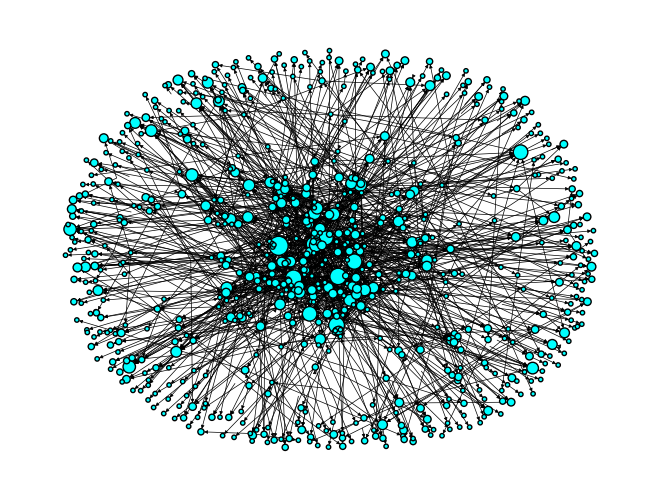

In [7]:
N1 = create_graph(1000, 1/3, 1/3, 1, 1, 0.5)
#pos = nx.kamada_kawai_layout(N1)
dict_indegrees = dict(N1.in_degree)
nx.draw(N1, node_color='cyan', font_color='black', edgecolors='black', 
        node_size=[v * 10 for v in dict_indegrees.values()], 
        font_size=10, vmin=-1, vmax=1, 
        cmap=plt.cm.get_cmap('magma'), width=0.5, arrowsize=5)
plt.show()

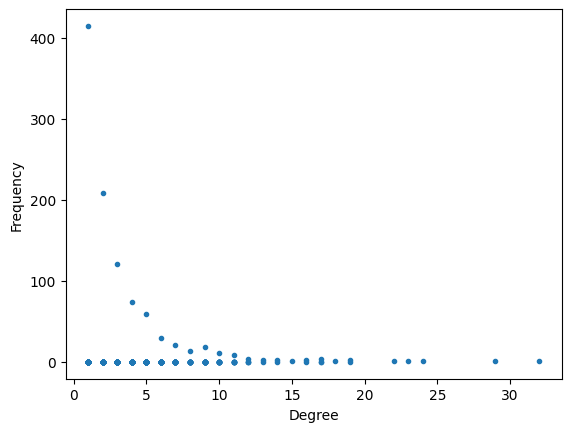

In [8]:
number_nodes = 1000
number_edges = []
# Inizializzo la lista della frequenza con un numero di zeri
# che è pari al numero di nodi nel grafo.
frequency = [0] * number_nodes

for node in list(N1.nodes()):

    # degree è il numero di archi (entranti e uscenti) di un nodo
    degree = N1.degree(nbunch=node)
    number_edges.append(degree)
    position = number_edges.index(degree)
    frequency[position] += 1
    
order = np.argsort(number_edges)
number_edges_array = np.array(number_edges)[order]
frequency = np.array(frequency)[order]
plt.plot(number_edges_array, frequency, ".")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

Calculating best minimal value for power law fit


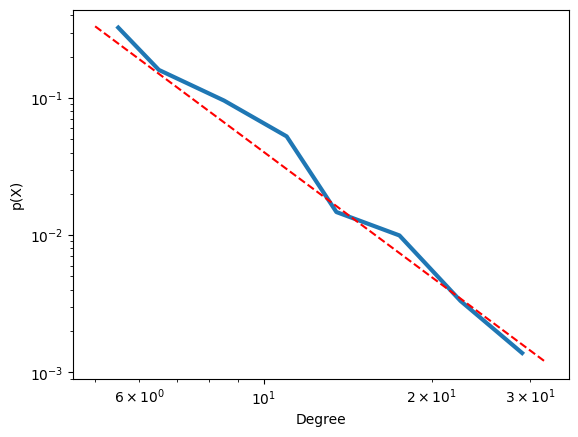

In [9]:
data_degree = [i for n,i in N1.degree()]
fit_degree = powerlaw.Fit(data_degree, discrete=True)
fig = fit_degree.plot_pdf(linewidth=3)
fit_degree.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.xlabel("Degree")
plt.ylabel("p(X)")
plt.show()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Text(0.5, 0, 'Indegree')

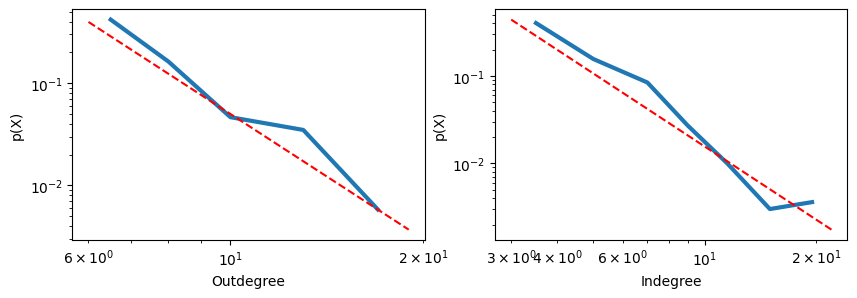

In [10]:
fig,axes = plt.subplots(1,2,figsize=(10,3))
titles = ['Outdegree', 'Indegree']

data_indegree = [i for n,i in N1.in_degree()]
fit_indegree = powerlaw.Fit(data_indegree, discrete=True)
fig = fit_indegree.plot_pdf(linewidth=3, ax=axes[0])
fit_indegree.power_law.plot_pdf(color='r', linestyle='--', ax=axes[0])
fig.set_ylabel(u"p(X)")
fig.set_xlabel(titles[0])

data_outdegree = [o for n,o in N1.out_degree()]
fit_outdegree = powerlaw.Fit(data_outdegree, discrete=True)
fig = fit_outdegree.plot_pdf(linewidth=3, ax=axes[1])
fit_outdegree.power_law.plot_pdf(color='r', linestyle='--', ax=axes[1])
fig.set_ylabel(u"p(X)")
fig.set_xlabel(titles[1])